# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
table=pd.read_html(url)
table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [10]:
# get all the rows of the page where the class is == data-row
data_rows = weather_soup.find_all('tr', class_="data-row")

for row in data_rows:
    print(row)
# row.text returns the table without the "headers", 
# in order of ID, terrestrial_date, SOL, ls, month, min_temp, and pressure

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>742.0</td>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list
weather_data = []
# Loop through the scraped data to create a list of rows
for row in data_rows:
    # find all rows with the table data through the td tag
    table_data = row.find_all('td')
    # create a list comprehension that extracts the text of the table data
    table_text = [value.text for value in table_data]
    # append the text to the empty list for the weather data
    weather_data.append(table_text)
    
weather_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weatherDF = pd.DataFrame(weather_data, columns= ['ID', 'Terrestrial Date', 'Martian Days', 'Longitude', 'Month', 'Min Temp','Pressure'])
weatherDF.head()

,ID,Terrestrial Date,Martian Days,Longitude,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [30]:
# Confirm DataFrame was created successfully
weatherDF

,ID,Terrestrial Date,Martian Days,Longitude,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine data type of each column
weatherDF.dtypes

ID                  object
terrestrial_date    object
SOL                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [48]:
# Change data types for data analysis
# 'ID', 'Terrestrial Date', 'Martian Days', 'Longitude', 'Month', 'Min Temp','Pressure'
weatherDF["Terrestrial Date"]= pd.to_datetime(weatherDF['Terrestrial Date'])
weatherDF["Martian Days"] = weatherDF['Martian Days'].astype('int64')
weatherDF["Longitude"] = weatherDF['Longitude'].astype('int64')
weatherDF["Month"] = weatherDF['Month'].astype('int64')
weatherDF["Min Temp"] = weatherDF['Min Temp'].astype(float)
weatherDF["Pressure"] = weatherDF['Pressure'].astype(float)

In [49]:
# Confirm type changes were successful by examining data types again
weatherDF.dtypes

ID                          object
Terrestrial Date    datetime64[ns]
Martian Days                 int64
Longitude                    int64
Month                        int64
Min Temp                   float64
Pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [50]:
# 1. How many months are there on Mars?
months = weatherDF["Month"].max()
print(f"There are {months} months on Mars.")

There are 12 months on Mars.


In [51]:
# 2. How many Martian days' worth of data are there?
days = weatherDF["Martian Days"].count()
days
print(f"There are {days} days worth of data.")

There are 1867 days worth of data.


In [84]:
# 3. What is the average low temperature by month?
# need to do a groupby of the month column  
# and do a .mean of the min temps
# makes a series of the values
low_temp = weatherDF.groupby("Month")["Min Temp"].mean()
low_temp

print(f"{low_temp} \n month 3 is the coldest, and month 8 is the warmest")
# month 3 is the coldest, and month 8 is the warmest

Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min Temp, dtype: float64 
 month 3 is the coldest, and month 8 is the warmest


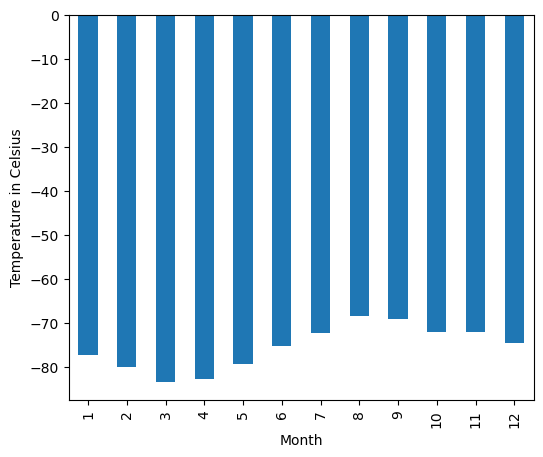

In [60]:
# Plot the average temperature by month
low_temp.plot(kind="bar", figsize=(6,5))

# set labels for x and y
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")

#show the chart
plt.show()

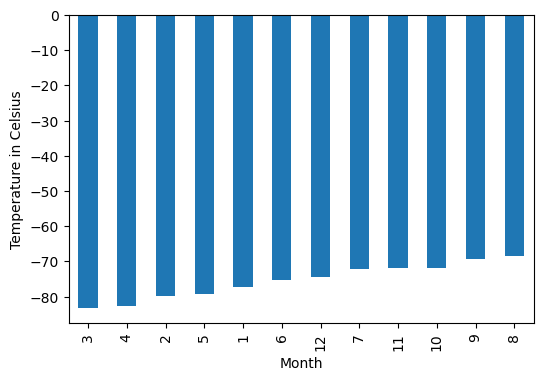

In [63]:
# Identify the coldest and hottest months in Curiosity's location
# sort the values first and then do a similar plot to above. 
low_temp_sorted = low_temp.sort_values() 

# plot the chart
low_temp_sorted.plot(kind="bar", figsize=(6,4))

# set labels
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")

# show the chart
plt.show()

In [83]:
# 4. Average pressure by Martian month
# do a group by of the month and the means of the pressures
# this will make a series we can use to plot below

avg_pressure = weatherDF.groupby("Month")['Pressure'].mean()
avg_pressure

print(f"{avg_pressure} \nThe month with the highest pressure is 9, with the lowest being 6.")

Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64 
The month with the highest pressure is 9, with the lowest being 6.


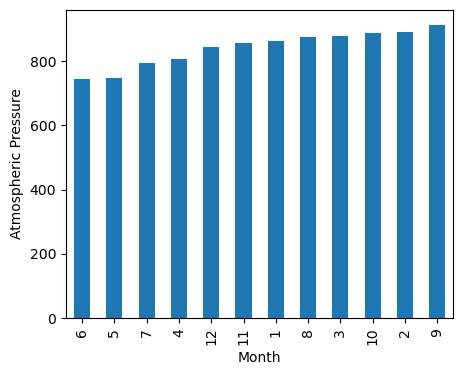

In [70]:
# Plot the average pressure by month
# sort the values then plot them
# plot the bar chart
avg_pressure_sorted= avg_pressure.sort_values()

avg_pressure_sorted.plot(kind="bar", figsize=(5,4))

# set labels
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

# show the chart
plt.show()

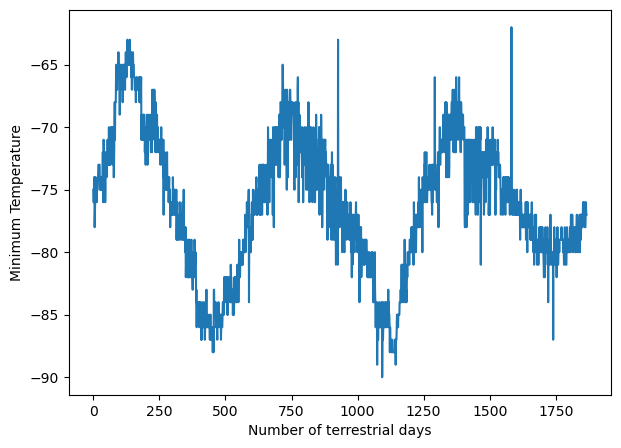

In [76]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days = weatherDF['Min Temp']

# plot the bar chart and resize it.
earth_days.plot(kind="line", figsize=(7,5))

# set the labels
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")

# show the chart
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [79]:
# Write the data to a CSV
weatherDF.to_csv("Output/Mars_Weather.csv", index=False, header=True)

In [80]:
browser.quit()